In [1]:
from numpy import *
from matplotlib.pyplot import *
import cv2

User defined function i.e. from scratch

In [2]:
def hough_transform(image, theta_res=1, rho_res=1):
    height, width = image.shape
    max_rho = int(ceil(sqrt(height**2 + width**2)))  # Maximum possible distance from origin
    theta_range = deg2rad(arange(-90, 90, theta_res))  # Range of theta from -90 to 89 degrees
    
    rho_range = linspace(-max_rho, max_rho, max_rho * 2 * rho_res)  # Range of rho from -max_rho to max_rho
    
    num_thetas = len(theta_range)
    accumulator = zeros((len(rho_range), num_thetas), dtype=uint64)
    
    edge_points = argwhere(image != 0)  # Get coordinates of edge points
    
    cos_theta = cos(theta_range)
    sin_theta = sin(theta_range)
    
    for y, x in edge_points:
        for t_idx in range(num_thetas):
            rho = int(x * cos_theta[t_idx] + y * sin_theta[t_idx])
            rho_idx = argmin(abs(rho_range - rho))
            accumulator[rho_idx, t_idx] += 1
    
    return accumulator, rho_range, rad2deg(theta_range)

In [3]:
def plot_hough_space(accumulator, rho_range, theta_range):
    figure(figsize=(10, 6))
    imshow(accumulator, cmap='gray', extent=[rad2deg(theta_range[0]), rad2deg(theta_range[-1]), rho_range[0], rho_range[-1]])
    xlabel('Theta (degrees)')
    ylabel('Rho (pixels)')
    title('Hough Transform Accumulator Space')
    colorbar()
    axis('image')
    show()

In [4]:
def detect_lines(image, accumulator, rho_range, theta_range, threshold):
    lines = []
    for rho_idx, theta_idx in argwhere(accumulator >= threshold):
        rho = rho_range[rho_idx]
        theta = theta_range[theta_idx]
        x0 = rho * cos(deg2rad(theta))
        y0 = rho * sin(deg2rad(theta))
        x1 = int(x0 + 1000 * (-sin(deg2rad(theta))))
        y1 = int(y0 + 1000 * (cos(deg2rad(theta))))
        x2 = int(x0 - 1000 * (-sin(deg2rad(theta))))
        y2 = int(y0 - 1000 * (cos(deg2rad(theta))))
        lines.append(((x1, y1), (x2, y2)))
    return lines

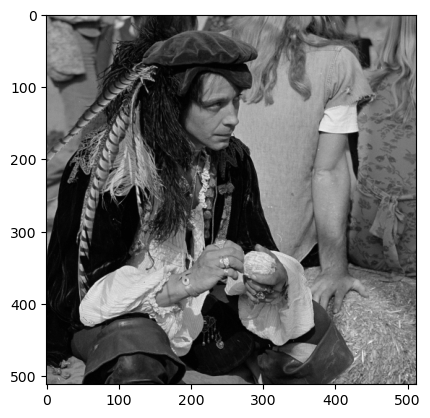

In [5]:
img=cv2.imread("pirate.tif",0)
imshow(img,cmap="gray")

In [6]:
# Perform edge detection (using Canny edge detector in this example)
edges = cv2.Canny(img, 50, 150)

In [7]:
# Call Hough Transform function
accumulator, rho_range, theta_range = hough_transform(edges)

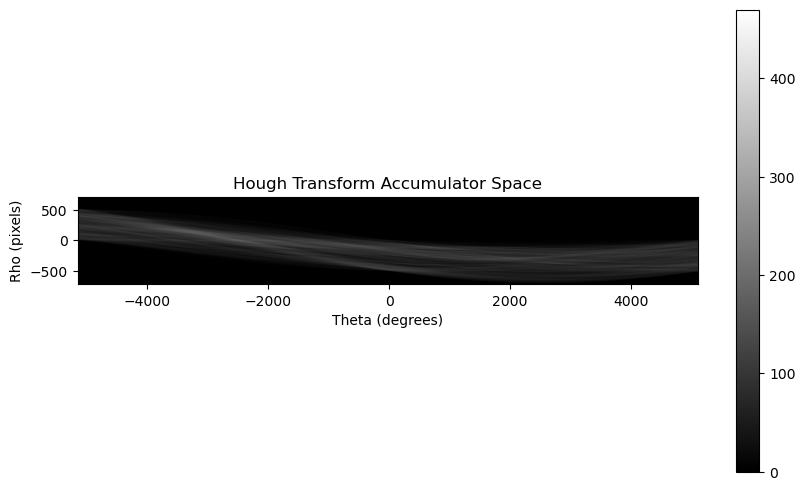

In [8]:
# Plot accumulator space
plot_hough_space(accumulator, rho_range, theta_range)

In [9]:
# Detect lines using a threshold
detected_lines = detect_lines(edges, accumulator, rho_range, theta_range, threshold=100)

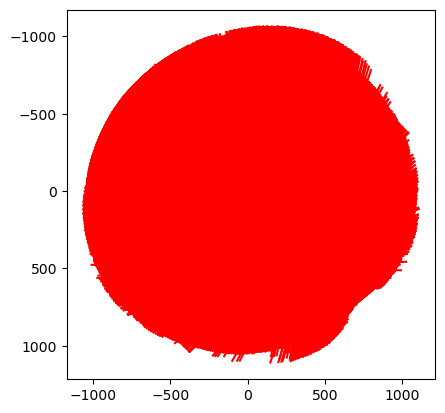

In [10]:
# Plot detected lines on the original image
imshow(img, cmap='gray')
for line in detected_lines:
    plot((line[0][0], line[1][0]), (line[0][1], line[1][1]), color='r')
show()

Using inbuilt function for verification

In [12]:
#importing the required library
from skimage.transform import hough_line, hough_line_peaks

In [21]:
#openCV Hough Transform
lines_opencv = cv2.HoughLines(edges, rho=1, theta=pi/180, threshold=100)
if lines_opencv is not None:
    for line in lines_opencv:
        rho, theta = line[0]
        a = cos(theta)
        b = sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

/var/folders/zf/zhsz36695md69xvnxl1dkbym0000gn/T/ipykernel_7552/3708900428.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  y0 = (dist - 0 * cos(angle)) / sin(angle)
/var/folders/zf/zhsz36695md69xvnxl1dkbym0000gn/T/ipykernel_7552/3708900428.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  y1 = (dist - img.shape[1] * cos(angle)) / sin(angle)


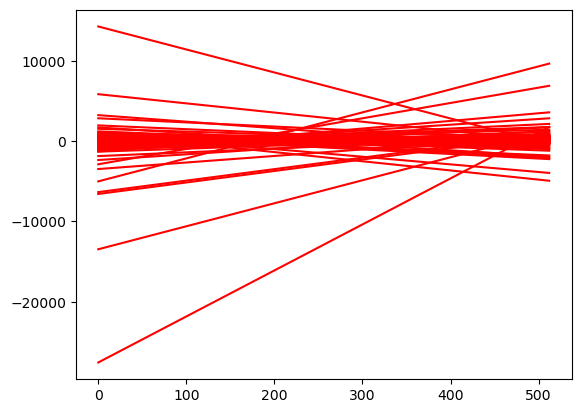

In [20]:
#scikit-image Hough Transform
h, theta, d = hough_line(edges)
peaks = hough_line_peaks(h, theta, d, threshold=100)
for _, angle, dist in zip(*peaks):
    y0 = (dist - 0 * cos(angle)) / sin(angle)
    y1 = (dist - img.shape[1] * cos(angle)) / sin(angle)
    plot((0, img.shape[1]), (y0, y1), '-r')

In [ ]:
imshow(img, cmap='gray')
show()